In [1]:
import requests 
import geopandas as gdp
import pandas as pd
#Calling HoyodeCrimen's API to retrieve a GEOJSON containing the polygons of Mexico City
url = requests.get("https://hoyodecrimen.com/api/v1/sectores/geojson")

#Converting the incoming data and checking the CRS format it comes with
filepath = url.text
cdmx = gdp.read_file(filepath)

#Conversion to Mexico City's CRS format
cdmx = cdmx.to_crs(6362)

df = pd.DataFrame(cdmx)

#For the other csv an online converter was used with the url https://hoyodecrimen.com/api/v1/sectores/all/crimes/all/period/change

df.head



<bound method NDFrame.head of              sector cve_mun            municipio  \
0    ABASTO-REFORMA    9007           IZTAPALAPA   
1             ALPES    9010       ALVARO OBREGON   
2   ANGEL-ZONA ROSA    9015           CUAUHTEMOC   
3            ARAGON    9005     GUSTAVO A MADERO   
4            ARENAL    9017  VENUSTIANO CARRANZA   
..              ...     ...                  ...   
67       TLATELOLCO    9015           CUAUHTEMOC   
68      UNIVERSIDAD    9003             COYOACAN   
69        XOTEPINGO    9003             COYOACAN   
70        ZAPOTITLA    9011              TLAHUAC   
71         ZARAGOZA    9017  VENUSTIANO CARRANZA   

                                             geometry  
0   POLYGON ((2808283.835 819339.207, 2808174.639 ...  
1   POLYGON ((2786290.411 814710.223, 2786259.251 ...  
2   POLYGON ((2795560.167 827622.478, 2795526.952 ...  
3   POLYGON ((2806178.253 830952.041, 2805746.645 ...  
4   POLYGON ((2805007.959 826432.874, 2805333.393 ...  
..       

In [3]:
print(df.columns)

Index(['sector', 'cve_mun', 'municipio', 'geometry'], dtype='object')


In [2]:
sector_list = df["sector"].unique()

In [3]:
sector_list.reshape(72,)

array(['ABASTO-REFORMA', 'ALPES', 'ANGEL-ZONA ROSA', 'ARAGON', 'ARENAL',
       'ASTURIAS', 'BUENAVISTA', 'CHAPULTEPEC', 'CHURUBUSCO', 'CLAVERIA',
       'COAPA', 'CONGRESO', 'CONSULADO', 'CORREDOR-CENTRO', 'COYOACAN',
       'CUAJIMALPA', 'CUAUTEPEC', 'CUCHILLA', 'CUITLAHUAC', 'CULHUACAN',
       'DEL VALLE', 'DINAMO', 'EL YAQUI', 'ESTRELLA', 'FUENTE', 'GRANJAS',
       'HORMIGA', 'HUIPULCO-HOSPITALES', 'IZTACCIHUATL', 'LA NORIA',
       'LA RAZA', 'LINDAVISTA', 'MERCED-BALBUENA', 'MILPA ALTA',
       'MIXCALCO-HERALDO', 'MIXQUIC', 'MOCTEZUMA', 'MORELOS', 'NAPOLES',
       'NARVARTE-ALAMOS', 'NATIVITAS', 'OASIS', 'PADIERNA', 'PANTITLAN',
       'PLATEROS', 'POLANCO-CASTILLO', 'PORTALES', 'PRADERA', 'QUETZAL',
       'QUIROGA', 'REVOLUCION-ALAMEDA', 'ROMA', 'SAN ANGEL',
       'SAN JERONIMO', 'SANTA CRUZ', 'SANTA FE', 'SOTELO', 'TACUBA',
       'TACUBAYA', 'TAXQUEÑA', 'TECOMITL', 'TEOTONGO', 'TEPEPAN',
       'TEPEYAC', 'TEZONCO', 'TICOMAN', 'TLACOTAL', 'TLATELOLCO',
       'UNIVERSIDA

In [4]:
from libpysal import weights
queen = weights.Queen.from_dataframe(cdmx)

C:\Users\Diego\AppData\Local\Temp\ipykernel_6184\796701889.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  queen = weights.Queen.from_dataframe(cdmx)


In [8]:
import networkx as nx
mapCDMX = queen.to_networkx()

In [9]:
print(mapCDMX)

Graph with 72 nodes and 186 edges


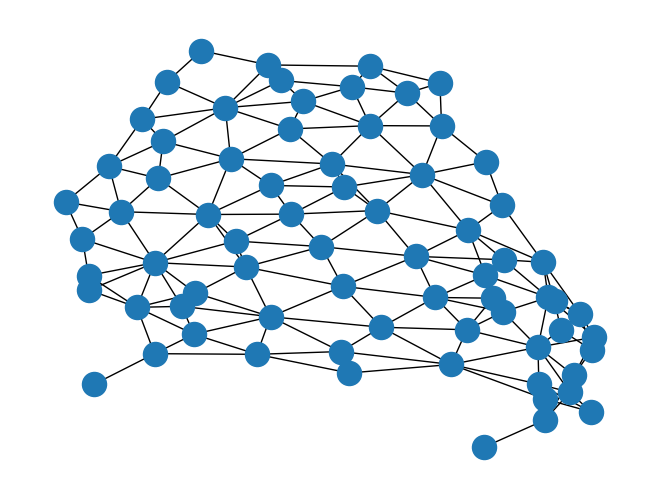

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(mapCDMX)
plt.show()

In [16]:
pd.DataFrame(sector_list).to_csv("mapCDMX.csv")

In [14]:
df_crime = pd.read_csv("C:/Users/Diego/PycharmProjects/SafeNav/assets/files/crimes new.csv")

In [16]:
df_crime.head


<bound method NDFrame.head of             rows/crime  rows/difference rows/end_period1 rows/end_period2  \
0     HOMICIDIO DOLOSO               -3          2022-12          2023-12   
1     HOMICIDIO DOLOSO                2          2022-12          2023-12   
2     HOMICIDIO DOLOSO                0          2022-12          2023-12   
3     HOMICIDIO DOLOSO               -6          2022-12          2023-12   
4     HOMICIDIO DOLOSO               -5          2022-12          2023-12   
...                ...              ...              ...              ...   
1455         VIOLACION               -6          2022-12          2023-12   
1456         VIOLACION               -8          2022-12          2023-12   
1457         VIOLACION               -7          2022-12          2023-12   
1458         VIOLACION               -8          2022-12          2023-12   
1459         VIOLACION                2          2022-12          2023-12   

      rows/period1_count  rows/period2_count 

In [17]:
df_crime.columns

Index(['rows/crime', 'rows/difference', 'rows/end_period1', 'rows/end_period2',
       'rows/period1_count', 'rows/period2_count', 'rows/population',
       'rows/sector', 'rows/start_period1', 'rows/start_period2'],
      dtype='object')

In [18]:
import numpy as np


In [26]:
a, b, c= df_crime["rows/crime"].to_numpy(), df_crime["rows/period2_count"].to_numpy() + np.ones((1460,), int), df_crime["rows/sector"].to_numpy()
parsed_crime = np.column_stack((a, b, c))


In [27]:
(parsed_crime[:,1].shape)

(1460,)

In [37]:

# Create an array of zeros with the same length as df
zeros_column = np.ones((sector_list.shape[0], 1))

# Concatenate df and zeros_column along a new axis
sector_crime = np.concatenate((np.expand_dims(sector_list, axis=1), zeros_column), axis=1)


In [38]:
n = 0
for sector in sector_list:
    crime_count = 0
    for row in parsed_crime:
        if row[2] == sector:
            crime_count += row[1]
    sector_crime[n,1] = crime_count
    n+=1


In [40]:
#Function from NetworkX documentation
def all_neighbors(graph, node):
    
     """Returns all of the neighbors of a node in the graph.
     If the graph is directed returns predecessors as well as successors.
     Parameters
     ----------
     graph : NetworkX graph
     Graph to find neighbors.
     node : node
     The node whose neighbors will be returned.
     Returns
     -------
     neighbors : iterator
     Iterator of neighbors
     """
     if graph.is_directed():
         
         values = chain(graph.predecessors(node), graph.successors(node))
     else:
         values = graph.neighbors(node)
         return values

In [50]:
weighted_graph = nx.MultiDiGraph() 


In [51]:
for node in mapCDMX:
    neighbors = list(all_neighbors(mapCDMX,node))
    for neighbor in neighbors:
        loc = np.where(sector_crime[:,0]== sector_list[neighbor])[0][0]
        weight = int(sector_crime[loc,1])
        weighted_graph.add_edge(node, neighbor, weight = weight)


In [53]:
weighted_dicts = nx.convert.to_dict_of_dicts(weighted_graph)
adjacency_matrix = np.zeros((72,72), dtype=int)
for x in range(72):
     single_dict = weighted_dicts[x]
     for key, value in single_dict.items(): #Key is np int, value is dict
         node, node_weight = int(key), value[0]["weight"]
         adjacency_matrix[x][node] = node_weight 
np.savetxt('Adjacency_Matrix',adjacency_matrix, delimiter=',', fmt= '%d')

In [45]:
cdmx.explore()


